 # Assignmnet 01   (Devanshi 23112029)

Kaggle Dataset Link: https://www.kaggle.com/datasets/mohamedtarek01234/steam-games-reviews-and-rankings/data

In [49]:
pwd

'/Users/devanshi/Downloads/archive'

In [50]:
import os
import numpy as alias_np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
os.chdir("/Users/devanshi/Downloads/archive")

In [52]:
pwd

'/Users/devanshi/Downloads/archive'

In [53]:
d1=pd.read_csv("games_ranking.csv")
d1.head(1)

,game_name,genre,rank_type,rank
0,Counter-Strike 2,Action,Sales,1


In [54]:
d2=pd.read_csv("steam_game_reviews.csv")
d2.head(1)

,review,hours_played,helpful,funny,recommendation,date,game_name,username
0,The game itself is also super fun. The PvP and...,39.9,"1,152",13,Recommended,14 September,"Warhammer 40,000: Space Marine 2",Sentinowl\n224 products in account


In [55]:
d3=pd.read_csv("games_description.csv")
d3.head(1)

,name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link
0,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,About This Game\n\t\t\t\t\t\t\tBlack Myth: Wuk...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"19 Aug, 2024",['Game Science'],['Game Science'],Overwhelmingly Positive,"(654,820)","51,931",https://store.steampowered.com/app/2358720/Bla...


In [56]:
df = pd.merge(d1, d2, on='game_name', how='outer').merge(d3, left_on='game_name', right_on='name', how='outer')


In [57]:
df.head(2)

,game_name,genre,rank_type,rank,review,hours_played,helpful,funny,recommendation,date,...,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link
0,Counter-Strike 2,Action,Sales,1.0,2023 - fix random cash issues- add new skins- ...,"4,737.7","2,405",35,Recommended,"31 March, 2023",...,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","21 Aug, 2012",['Valve'],['Valve'],Very Positive,"(8,313,603)","2,258,990",https://store.steampowered.com/app/730/Counter...
1,Counter-Strike 2,Action,Sales,1.0,2023 󠁳,"5,656.1","1,356",287,Recommended,"11 October, 2023",...,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","21 Aug, 2012",['Valve'],['Valve'],Very Positive,"(8,313,603)","2,258,990",https://store.steampowered.com/app/730/Counter...


In [58]:
df.shape

(2194468, 24)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2194468 entries, 0 to 2194467
Data columns (total 24 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   game_name                                object 
 1   genre                                    object 
 2   rank_type                                object 
 3   rank                                     float64
 4   review                                   object 
 5   hours_played                             object 
 6   helpful                                  object 
 7   funny                                    object 
 8   recommendation                           object 
 9   date                                     object 
 10  username                                 object 
 11  name                                     object 
 12  short_description                        object 
 13  long_description                         object 
 14  genres            

In [60]:
df['hours_played']=df['hours_played'].str.replace(',', '').astype('float')

In [61]:
df['helpful'] = df['helpful'].str.replace(',', '').astype('float')

In [62]:
df['funny']=df['funny'].str.replace(',','').astype('float')

In [63]:
df['number_of_english_reviews']=df['number_of_english_reviews'].str.replace(',','').astype('float')

In [64]:
df.dtypes

game_name                                   object
genre                                       object
rank_type                                   object
rank                                       float64
review                                      object
hours_played                               float64
helpful                                    float64
funny                                      float64
recommendation                              object
date                                        object
username                                    object
name                                        object
short_description                           object
long_description                            object
genres                                      object
minimum_system_requirement                  object
recommend_system_requirement                object
release_date                                object
developer                                   object
publisher                      

In [65]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.head(4)

,rank,hours_played,helpful,funny,number_of_english_reviews
0,1.0,4737.7,2405.0,35.0,2258990.0
1,1.0,5656.1,1356.0,287.0,2258990.0
2,1.0,1010.7,420.0,4.0,2258990.0
3,1.0,2628.8,1852.0,1584.0,2258990.0


In [66]:
result = pd.concat([df[['game_name','genre']],numeric_df], axis=1)
result.head(2)

,game_name,genre,rank,hours_played,helpful,funny,number_of_english_reviews
0,Counter-Strike 2,Action,1.0,4737.7,2405.0,35.0,2258990.0
1,Counter-Strike 2,Action,1.0,5656.1,1356.0,287.0,2258990.0


In [67]:
result.isnull().sum()

game_name                        0
genre                        66909
rank                         66909
hours_played                   173
helpful                       9286
funny                         9286
number_of_english_reviews    66925
dtype: int64

In [68]:
result = result.dropna(subset=['genre', 'rank', 'hours_played', 'helpful', 'funny', 'number_of_english_reviews'])

result.isnull().sum()

game_name                    0
genre                        0
rank                         0
hours_played                 0
helpful                      0
funny                        0
number_of_english_reviews    0
dtype: int64

In [69]:
result.shape

(2118913, 7)

In [70]:
result.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
2127554     True
2127555    False
2127556    False
2127557    False
2127558    False
Length: 2118913, dtype: bool

# Univaritate Analysis

In [71]:
import warnings
warnings.filterwarnings('ignore')

In [72]:
result['rank'].describe()

count    2.118913e+06
mean     2.008108e+01
std      1.089749e+01
min      1.000000e+00
25%      1.100000e+01
50%      2.000000e+01
75%      2.900000e+01
max      4.000000e+01
Name: rank, dtype: float64

In [73]:
result['hours_played'].describe()

count    2.118913e+06
mean     4.228751e+02
std      1.372950e+03
min      0.000000e+00
25%      2.330000e+01
50%      7.720000e+01
75%      2.815000e+02
max      1.070751e+05
Name: hours_played, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

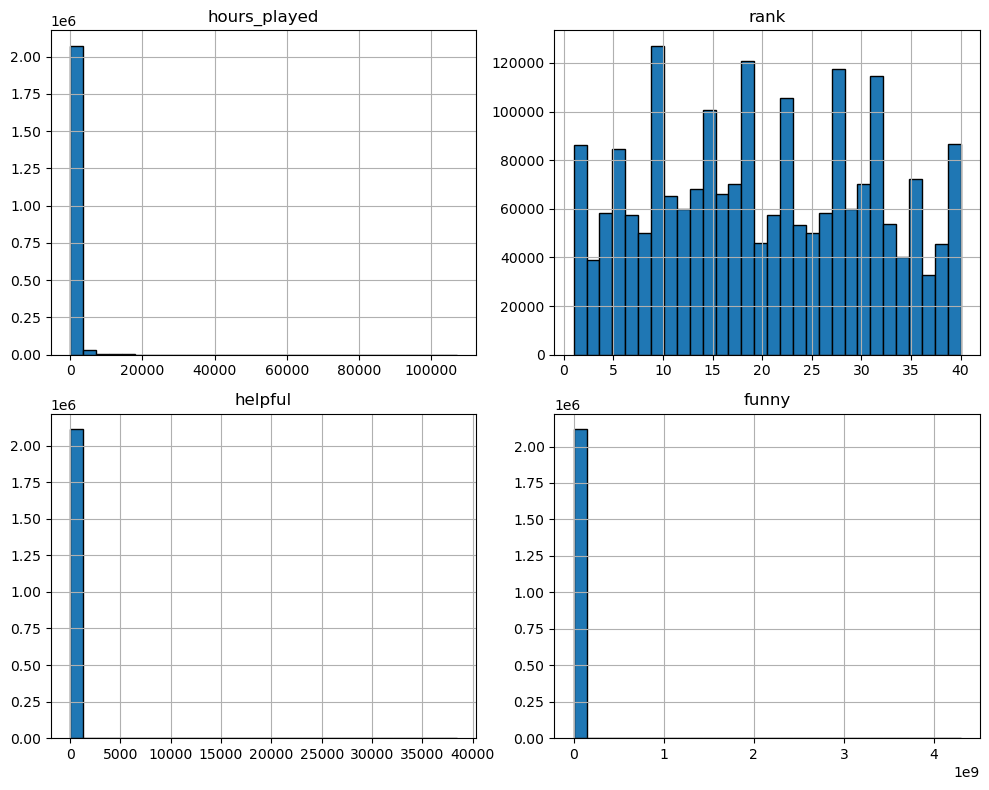

In [74]:
graphplot = ['hours_played', 'rank', 'helpful', 'funny']

result[graphplot].hist(bins=30, edgecolor='black', figsize=(10, 8))
plt.tight_layout()
plt.show

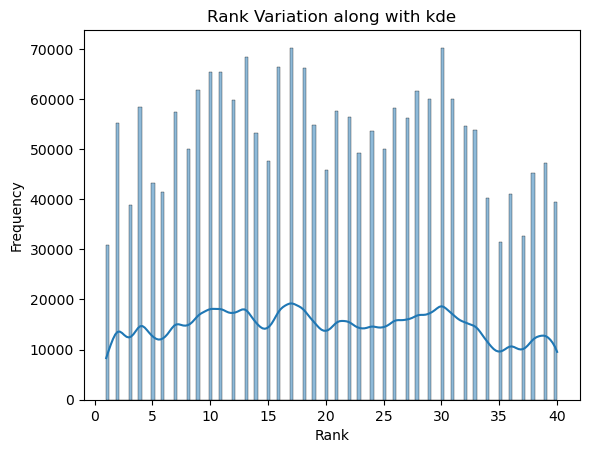

In [75]:
sns.histplot(result['rank'], kde=True)
plt.title('Rank Variation along with kde')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

<Axes: >

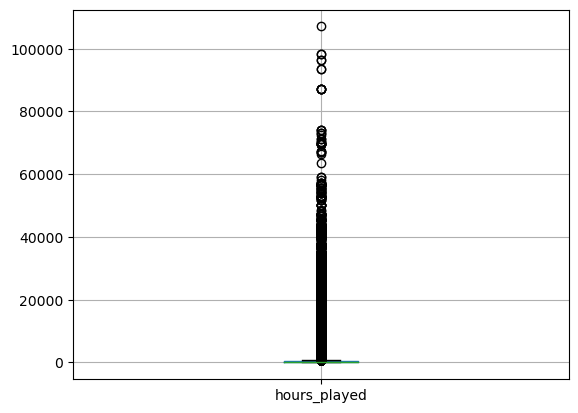

In [76]:
df.boxplot(column='hours_played')

In [77]:
game_name_counts = df['game_name'].value_counts()
genre_counts = df['genre'].value_counts()
recommendation_counts = df['recommendation'].value_counts()
developer_counts = df['developer'].value_counts()

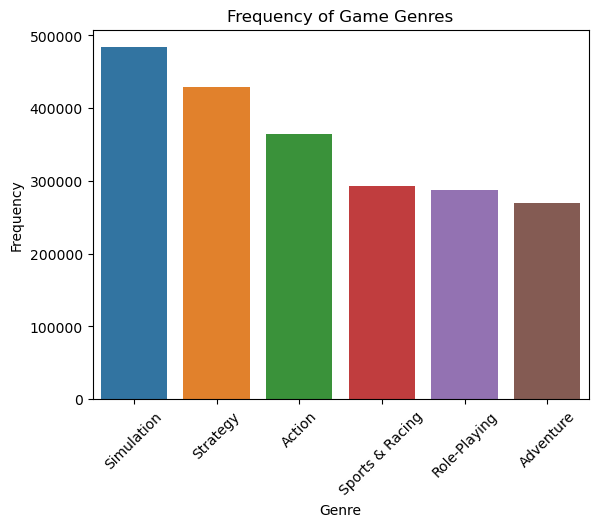

In [78]:
sns.barplot(x=genre_counts.index,y=genre_counts.values)
plt.title('Frequency of Game Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

 # Bivariate Analysis


In [79]:
top_ranked_per_genre = (
    df.groupby("genre")
    .apply(lambda x: x.nlargest(10, "rank"))
    .reset_index(drop=True)
)

# Print only the first 5 rows
print(top_ranked_per_genre.head())


        game_name   genre rank_type  rank  \
0  Risk of Rain 2  Action   Revenue  40.0   
1  Risk of Rain 2  Action   Revenue  40.0   
2  Risk of Rain 2  Action   Revenue  40.0   
3  Risk of Rain 2  Action   Revenue  40.0   
4  Risk of Rain 2  Action   Revenue  40.0   

                                              review  hours_played  helpful  \
0  2020 Early Access Review In Risk of Rain 2 you...         231.9    962.0   
1  2022 - play game- get loot- become op to the p...         312.7   1530.0   
2  2023 99% of survivors stop praying to the shri...          37.6    550.0   
3                             2022 where is the rain         194.6    827.0   
4  2021 You offer to the shrine, but gain nothing...         434.8    893.0   

   funny recommendation               date  ...  \
0  628.0    Recommended      10 June, 2020  ...   
1  480.0    Recommended      1 March, 2022  ...   
2  205.0    Recommended      21 July, 2023  ...   
3  443.0    Recommended   9 December, 2022  ...   

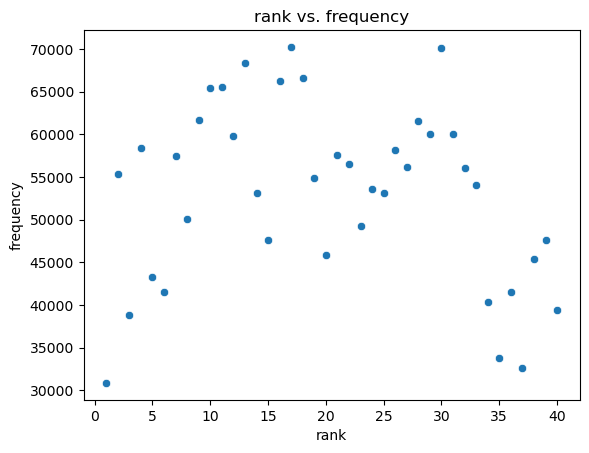

In [80]:
rank_counts = df['rank'].value_counts().reset_index()
rank_counts.columns = ['rank', 'frequency']
sns.scatterplot(x='rank', y='frequency', data=rank_counts, legend=False)
plt.title("rank vs. frequency")
plt.xlabel("rank")
plt.ylabel("frequency")
plt.show()

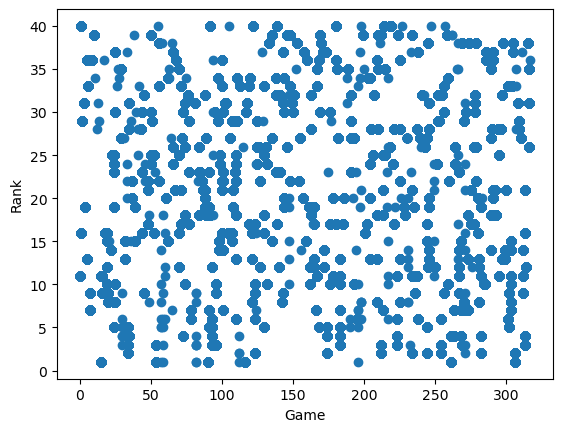

In [81]:
df['game_numeric'] = df['game_name'].astype('category').cat.codes
plt.scatter(df['game_numeric'], df['rank'])
plt.xlabel('Game')
plt.ylabel('Rank')
plt.show()

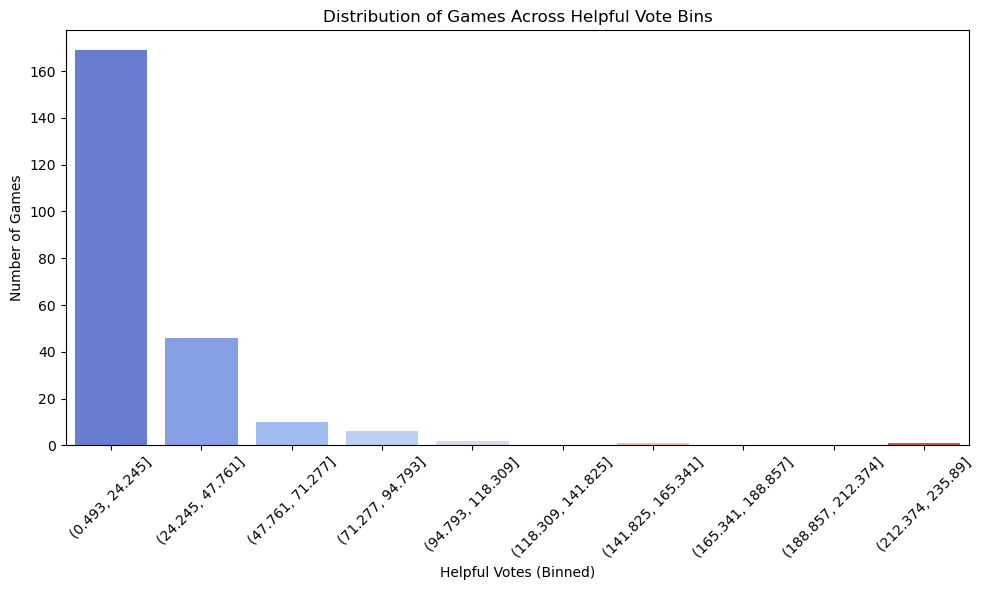

In [82]:
 #Count Plot



#remove commas from 'helpful' column and convert it to numeric
df['helpful'] = df['helpful'].replace({',': ''}, regex=True).astype(float)

# Calculating the average 'helpful' count per game (as a proxy for rating)
average_helpful = df.groupby("game_name")["helpful"].mean().reset_index()

# Create 10 bins for the average helpful votes (treating it as 'rating')
bins = pd.cut(average_helpful['helpful'], bins=10)

# Visualizing the number of games in each helpful bin
plt.figure(figsize=(10, 6))

# Plot the distribution of games within each helpful bin
sns.countplot(x=bins, palette='coolwarm')

# Add labels and title
plt.xlabel('Helpful Votes (Binned)')
plt.ylabel('Number of Games')
plt.title('Distribution of Games Across Helpful Vote Bins')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

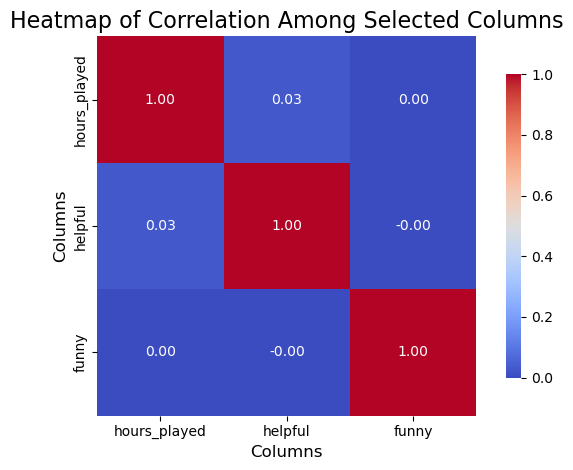

In [83]:
numeric_cols = ['hours_played', 'helpful', 'funny'] 

correlation_matrix = df[numeric_cols].corr()

sns.heatmap(
    correlation_matrix,
    annot=True,               # Display the correlation values on the heatmap
    fmt=".2f",                # Format the annotation to two decimal places
    cmap='coolwarm',          # Choose a color map
    square=True,              # Make the cells square-shaped
    cbar_kws={"shrink": .8}   # Adjust color bar size
)


plt.title('Heatmap of Correlation Among Selected Columns', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Columns', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


In [84]:
mean_hours_played_by_game = df.groupby('game_name')['hours_played'].mean()
print(mean_hours_played_by_game)

game_name
69 Balls                                                              31.705000
7 Days to Die                                                        938.414810
ARK: Survival Ascended                                               312.439899
ARK: Survival Evolved                                               1908.350200
Age of Empires II (Retired)                                          341.793214
                                                                       ...     
eFootball™                                                           167.311756
iRacing                                                              248.100922
shapez 2                                                              43.878289
theHunter: Call of the Wild™                                         205.311996
theHunter: Call of the Wild™ - Sundarpatan Nepal Hunting Reserve            NaN
Name: hours_played, Length: 318, dtype: float64


Hours Played vs. Helpful

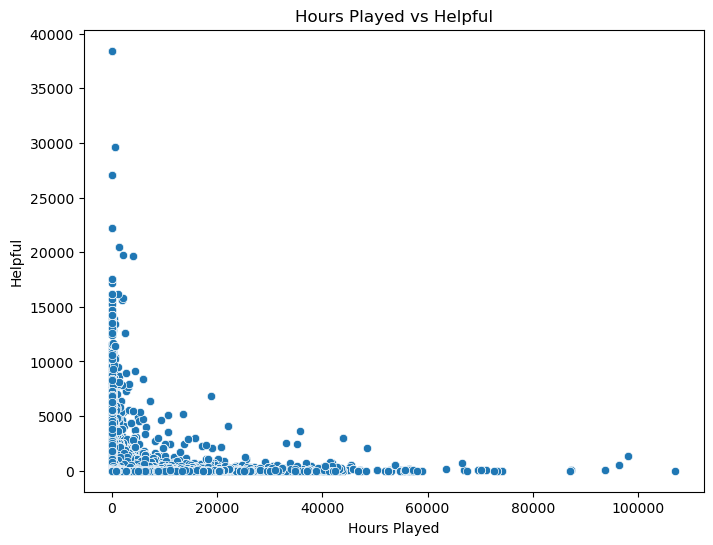

In [85]:
from scipy.stats import pearsonr
plt.figure(figsize=(8,6))
sns.scatterplot(x='hours_played', y='helpful', data=df)
plt.title('Hours Played vs Helpful')
plt.xlabel('Hours Played')
plt.ylabel('Helpful')

plt.show()

In [86]:
print( df[numeric_cols].isnull().sum())  
print(np.isinf( df[numeric_cols]).sum())  

hours_played     173
helpful         9286
funny           9286
dtype: int64


NameError: name 'np' is not defined

In [ ]:
data_cleaned = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['hours_played', 'funny'])

In [87]:
if len(data_cleaned) > 1: 
    corr, _ = pearsonr(data_cleaned['hours_played'], data_cleaned['funny'])
    print(f"Pearson correlation coefficient between hours played and funny: {corr:.2f}")
else:
    print("Not enough data to calculate Pearson correlation.")

NameError: name 'data_cleaned' is not defined

Hours Played vs Funny

In [88]:
data_cleaned1 = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['hours_played', 'funny'])

NameError: name 'np' is not defined

In [89]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='hours_played', y='funny', data=data_cleaned1)
plt.title('Hours Played vs Funny')
plt.xlabel('Hours Played')
plt.ylabel('Funny')
plt.show()

NameError: name 'data_cleaned1' is not defined

<Figure size 800x600 with 0 Axes>

Rank vs Helpful

In [90]:
print(df.isnull().sum())
print(np.isinf(df[numeric_cols]).sum())

game_name                                      0
genre                                      66909
rank_type                                  66909
rank                                       66909
review                                      1318
hours_played                                 173
helpful                                     9286
funny                                       9286
recommendation                               173
date                                         173
username                                     345
name                                       66925
short_description                          66947
long_description                           66925
genres                                     66925
minimum_system_requirement                 66925
recommend_system_requirement               66925
release_date                               66925
developer                                  66925
publisher                                  66925
overall_player_ratin

NameError: name 'np' is not defined

In [ ]:
data_cleaned = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['rank', 'helpful'])

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rank', y='helpful', data=data_cleaned)
plt.title('Rank vs Helpful')
plt.xlabel('Rank')
plt.ylabel('Helpful')
plt.show()


In [ ]:
if len(data_cleaned) > 1:  
    corr, _ = pearsonr(data_cleaned['rank'], data_cleaned['helpful'])
    print(f"Pearson correlation coefficient between rank and helpful: {corr:.2f}")
else:
    print("Not enough data to calculate Pearson correlation.")

Summary

It analyzed how the ranks, reviews, hours played, helpful votes, and funny reactions of a specific game related to other similar games.
The most striking finding is that there is very little relationship in between hours played and "funny" reactions: the Pearson correlation coefficient is practically zero (0.00). This hints at a very weak or non-existent relationship between hours people spend playing any given game and how funny they find a game or its reviews. A similar result occurred as regards hours played versus "helpful" votes, with a clear kind of scatter with no obvious pattern.
Furthermore, ranks and helpful votes had a rather slight negative correlation of -0.04, meaning that the higher ranks-that is, the closer to 1-do not necessarily correspond to more helpful votes. This could mean that the games with the very best ranks are not necessarily followed by good, detailed or helpful feedback and that such influences might have other reasons aside from gameplay itself (like marketing or fan loyalty).
Insights into the genre are that games under Action, RPGs, and Sports & Racing genres were much more often ranked and reviewed. The "top-ranked per genre" analysis breaks up the dominance in the higher ranks for specific genres. Some genres are predictably dominant, with titles that feature well across the sales and review rankings, such as Counter-Strike and Risk of Rain 2. Also, releases of games from the likes of Gearbox and Hopoo Games are oftentimes met with very favorable feedback. For instance, Risk of Rain 2 is one of the best scored on Steam; this is yet another proof of the fact that strong associations between familiar companies and the satisfaction of players. 
Heat maps generated for numeric columns showed a very clear picture of the lack of strong linear relationships among most metrics like those identified with hours played, helpful, and funny votes. Overall, while there are certainly some games that received fantastic positive or funny responses, no one metric can predict overall popularity for any game based on this data set. Instead, it suggests that player engagement is driven by one complex set of drivers.